# NOTE: DISARANKAN MEMBUKA DENGAN GOOGLE COLAB 

Mengimport modul-modul yang diperlukan

In [0]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

import json

Mendeklarasikan dataset yang akan diubah menjadi objek DataFrame untuk dilakukan pengolahan. 

*NOTE: Pada file `.csv` yang diberikan, baris teratas dari file tersebut adalah `id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type` yang membuat `pandas` menganggap baris pertama mengandung nilai-nilai tersebut, bukan nilai numerik. Oleh karena itu kita perlu menghapus baris paling atas tersebut.

In [0]:
dfWithNull = pd.read_csv(filepath_or_buffer='bird.csv', header=None, sep=',')
dfWithNull.columns = [
    'id',
    'huml',
    'humw',
    'ulnal',
    'ulnaw',
    'feml',
    'femw',
    'tibl',
    'tibw',
    'tarl',
    'tarw',
    'type'
]

1. [30] Deskripsikan secara singkat tentang dataset Anda (jumlah atribut, jumlah data, jumlah data tak
valid, contoh histogram minimal 5 atribut yang Anda anggap menarik, contoh scatterplot minimal 5
pasang atribut yang Anda anggap menarik, dll)

Deskripsi singkat dataset

Pada dataset ini (`birds`), terdapat 11 **atribut**, yaitu

1. `huml`
2. `humw`
3. `ulna`
4. `ulna`
5. `feml`
6. `femw`
7. `tibl`
8. `tibw`
9. `tarl`
10. `tarw`
11. `type`

Namun, `type` merupakan data non numerik



Jumlah data total: 420



In [0]:
dfWithNull

id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw type
0      0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   SW
1      1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   SW
2      2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   SW
3      3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   SW
4      4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   SW
..   ...    ...   ...    ...    ...    ...   ...    ...   ...    ...   ...  ...
415  415  17.96  1.63  19.25   1.33  18.36  1.54  31.25  1.33  21.99  1.15   SO
416  416  19.21  1.64  20.76   1.49  19.24  1.45  33.21  1.28  23.60  1.15   SO
417  417  18.79  1.63  19.83   1.53  20.96  1.43  34.45  1.41  22.86  1.21   SO
418  418  20.38  1.78  22.53   1.50  21.35  1.48  36.09  1.53  25.98  1.24   SO
419  419  17.89  1.44  19.26   1.10  17.62  1.34  29.81  1.24  21.69  1.05   SO

[420 rows x 12 columns]

Jumlah data valid (row tanpa satupun nilai kosong/NA/NaN/null):

In [0]:
dfWithNull.dropna().describe()

id        huml        humw  ...        tibw        tarl        tarw
count  413.000000  413.000000  413.000000  ...  413.000000  413.000000  413.000000
mean   207.987893   64.874867    4.381235  ...    3.182324   39.309806    2.944891
std    121.199236   54.056078    2.861460  ...    2.084124   23.272704    2.194744
min      0.000000    9.850000    1.140000  ...    0.870000    7.770000    0.660000
25%    103.000000   25.360000    2.200000  ...    1.560000   23.050000    1.430000
50%    209.000000   44.180000    3.500000  ...    2.490000   31.740000    2.240000
75%    312.000000   90.490000    5.820000  ...    4.250000   50.440000    3.520000
max    419.000000  420.000000   17.840000  ...   11.030000  175.000000   14.090000

[8 rows x 11 columns]

Maka, dalam dataset terdapat 420 data yang terdiri dari 414 data valid dan 6 data tidak valid.

Box plot untuk setiap atribut

In [0]:
# Hilangkan comment untuk atribut yang ingin ditampilkan box plotnya
#sns.boxplot(x=df['humw'], data=df)
#sns.boxplot(x=df['huml'], data=df)
#sns.boxplot(x=df['ulnal'], data=df)
#sns.boxplot(x=df['ulnaw'], data=df)
#sns.boxplot(x=df['feml'], data=df)
#sns.boxplot(x=df['femw'], data=df)
#sns.boxplot(x=df['tibl'], data=df)
#sns.boxplot(x=df['tibw'], data=df)
#sns.boxplot(x=df['tarl'], data=df)
#sns.boxplot(x=df['tarw'], data=df)

Histogram untuk setiap atribut numerik

In [0]:
df.plot(x='huml', y='huml',  kind='scatter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e17f18d30>]],
      dtype=object)

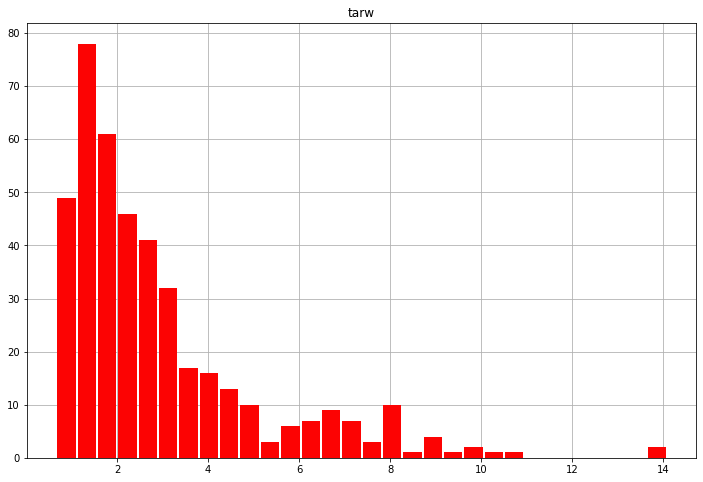

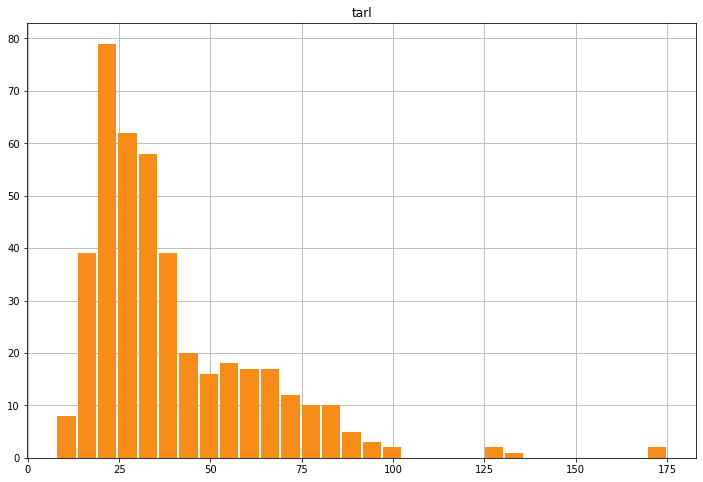

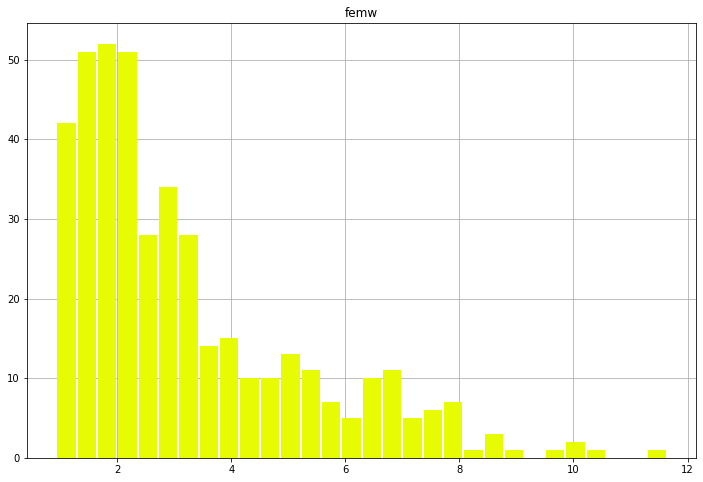

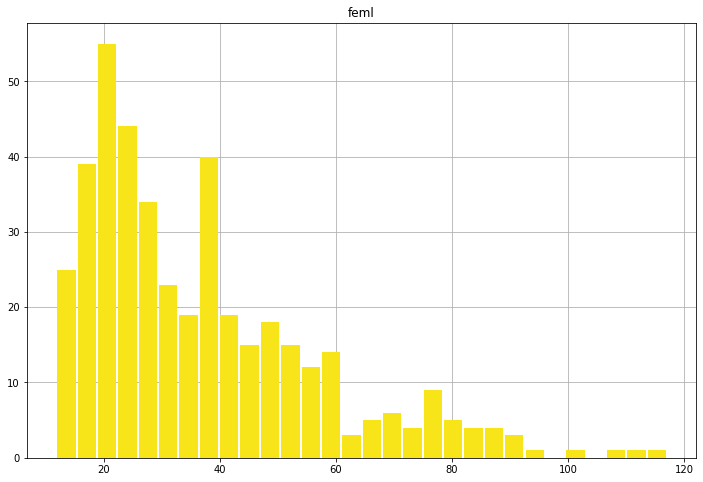

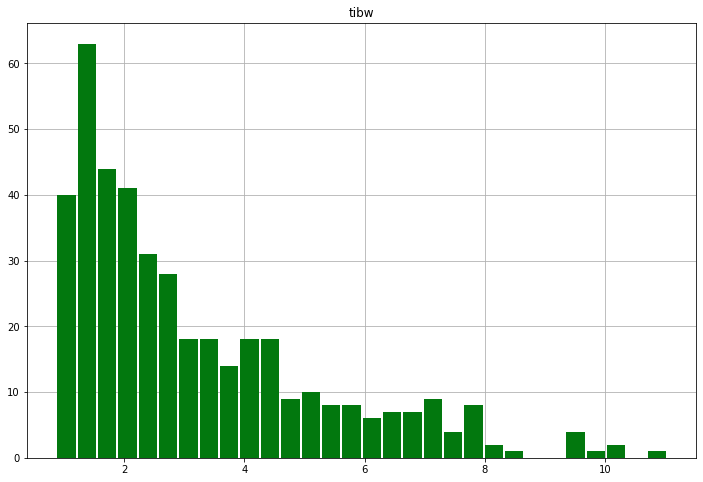

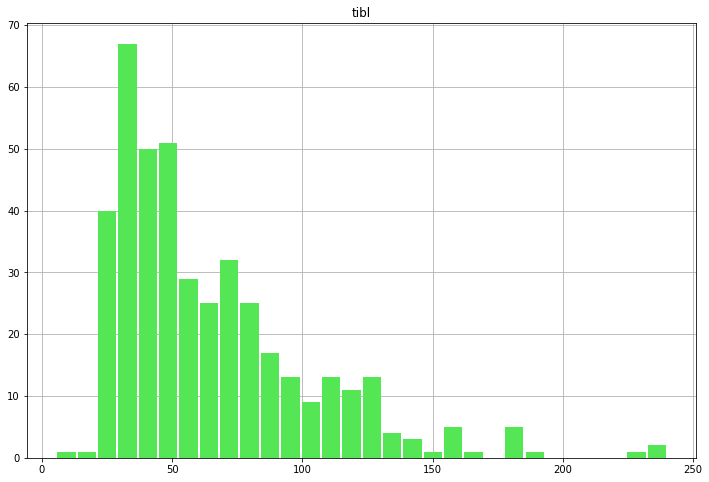

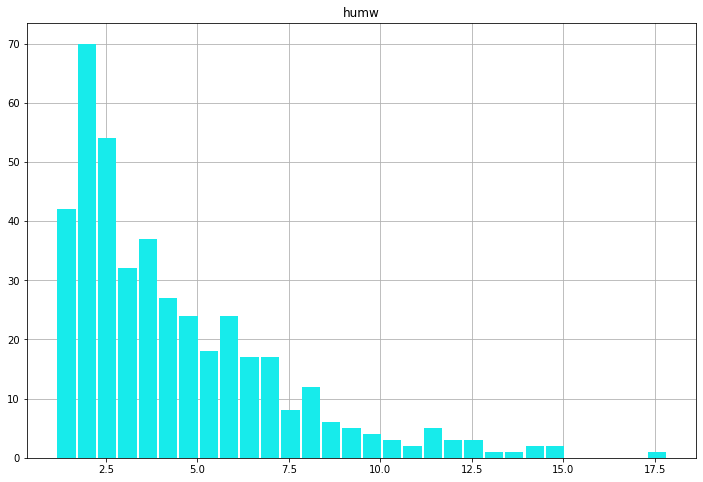

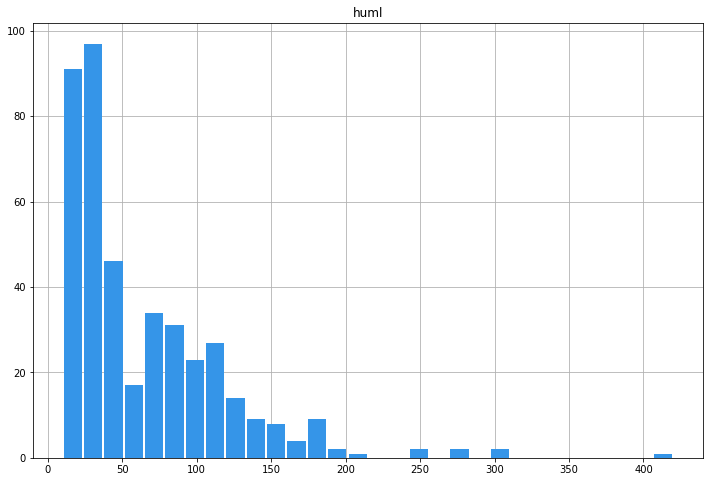

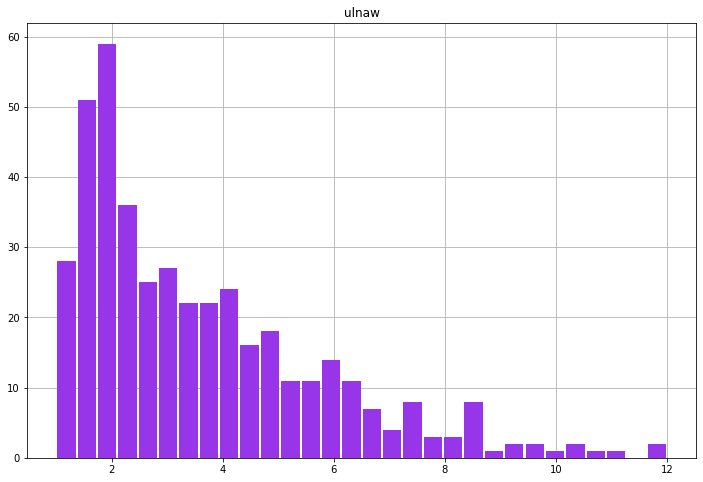

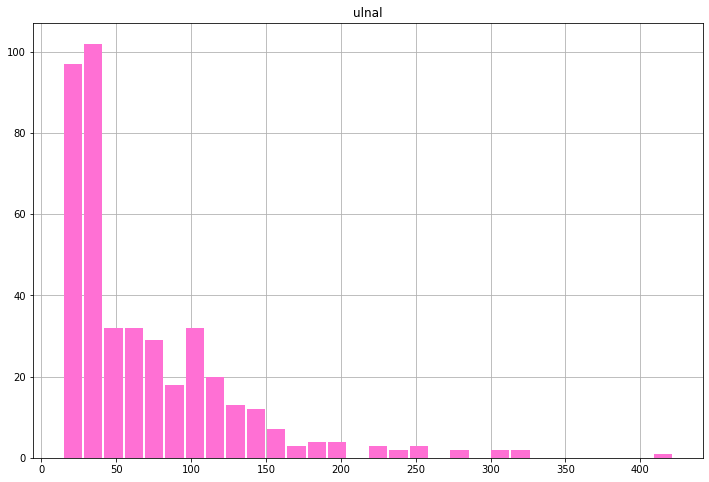

In [0]:
df.hist(column='tarw', bins=30, grid=True, figsize=(12,8), color='#fc0303', zorder=2, rwidth=0.9)
df.hist(column='tarl', bins=30, grid=True, figsize=(12,8), color='#f78c19', zorder=2, rwidth=0.9)
df.hist(column='femw', bins=30, grid=True, figsize=(12,8), color='#e7fc03', zorder=2, rwidth=0.9)
df.hist(column='feml', bins=30, grid=True, figsize=(12,8), color='#f7e419', zorder=2, rwidth=0.9)
df.hist(column='tibw', bins=30, grid=True, figsize=(12,8), color='#02780e', zorder=2, rwidth=0.9)
df.hist(column='tibl', bins=30, grid=True, figsize=(12,8), color='#55e655', zorder=2, rwidth=0.9)
df.hist(column='humw', bins=30, grid=True, figsize=(12,8), color='#17ebeb', zorder=2, rwidth=0.9)
df.hist(column='huml', bins=30, grid=True, figsize=(12,8), color='#3595e8', zorder=2, rwidth=0.9)
df.hist(column='ulnaw', bins=30, grid=True, figsize=(12,8), color='#9735e8', zorder=2, rwidth=0.9)
df.hist(column='ulnal', bins=30, grid=True, figsize=(12,8), color='#ff70d4', zorder=2, rwidth=0.9)

5 contoh scatterplot

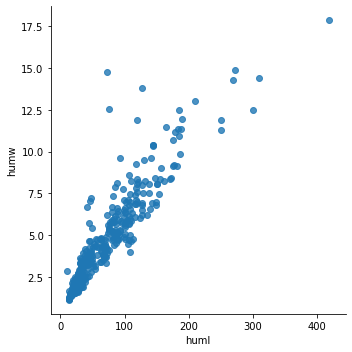

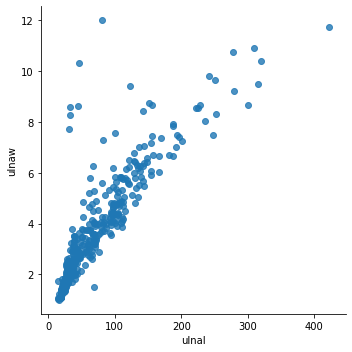

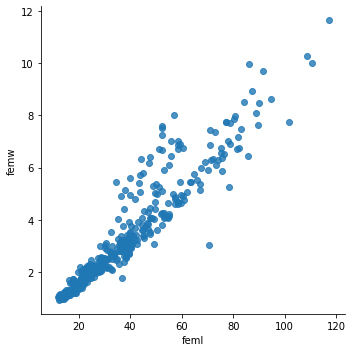

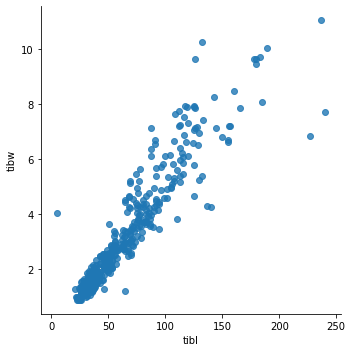

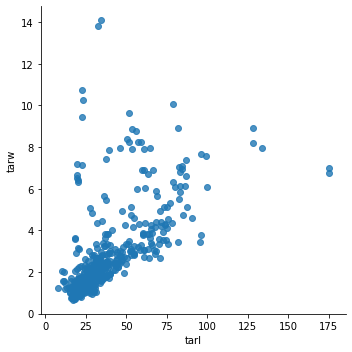

In [0]:
sns.lmplot(x='huml', y='humw', data=df, fit_reg = False)
plt.show()
sns.lmplot(x='ulnal', y='ulnaw', data=df, fit_reg = False)
plt.show()
sns.lmplot(x='feml', y='femw', data=df, fit_reg = False)
plt.show()
sns.lmplot(x='tibl', y='tibw', data=df, fit_reg = False)
plt.show()
sns.lmplot(x='tarl', y='tarw', data=df, fit_reg = False)
plt.show()

Hal menarik yang saya lihat adalah bahwa pada setiap tulang humerus, ulna, femur, tibiotarsus, dan tarsometatarsus, length dan widthnya relatif berkorelasi positif.


2. [10] Menurut Anda, apakah sebaiknya perlu dilakukan normalisasi terhadap data sebelum pemrosesan lebih lanjut, atau cukup menggunakan data asli? Berikan contoh ekstrimnya.

Ya. Sebaiknya dilakukan normalisasi/standardisasi, karena jika tidak, variabel (dari data asli) yang memiliki variansi tinggi akan terlalu mendominasi variabel lain yang menyebabkan variabel lain terlihat berkontribusi sangat kecil, padahal kenyataannya tidak seperti itu. Dengan menormalisasi data, data asli akan diproyeksikan terhadap arah ortogonal sehingga memaksimalkan variansi. ***Normalisasi*** juga membuat semua nilai data memiliki range antara 0 dan 1, sehingga outlier-outlier (jika ada) juga dimasukkan ke range tersebut sehingga memudahkan proses pengolahan.

Sebelum normalisasi

![Sebelum normalisasi](https://i.stack.imgur.com/lS3wA.png)

Sesudah normalisasi

![Setelah normalisasi](https://i.stack.imgur.com/rqYHf.png)

Contoh ekstrim: pada dataset terdapat dua buah atribut yang berbeda satuan, yaitu centimeter dan kilometer, yang tentu saja range dari data tersebut berbeda. 


Referensi:
- https://communities.sas.com/t5/SAS-Communities-Library/To-standardize-data-or-not-to-standardize-data-that-is-the/ta-p/361726
- https://www.researchgate.net/post/Is_it_necessary_to_normalize_data_before_performing_principle_component_analysis
- https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca
- https://discuss.analyticsvidhya.com/t/why-do-the-variables-have-to-be-standardised-prior-to-applying-pca/2577



*   List item
*   List item


3. [60] Carilah eigenvector dan eigenvalue dari dataset Anda. Rekomendasikan berapa jumlah principle component yang sebaiknya digunakan untuk dataset Anda, jika Anda menginginkan dimensi sekecil mungkin namun hasil plot kelas dapat terpisahkan dengan baik secara visual. Berikan analisis singkat mengapa Anda merekomendasikan hal tersebut.

Karena terdapat row yang memiliki paling sedikit satu nilai kosong, kita perlu mengisi nilai-nilai 
kosong tersebut dengan rata-rata dari tiap atribut.

In [0]:
meanJson = dfWithNull.mean(axis = 0, skipna = True).to_json()
meanDict = json.loads(meanJson)

# Variabel ini mengandung nilai rata-rata dari setiap atribut.
valuesToFill = {
    'huml': meanDict['huml'],
    'humw': meanDict['humw'],
    'ulnal': meanDict['ulnal'],
    'ulnaw': meanDict['ulnaw'],
    'feml': meanDict['feml'],
    'femw': meanDict['femw'],
    'tibl': meanDict['tibl'],
    'tibw': meanDict['tibw'],
    'tarl': meanDict['tarl'],
    'tarw': meanDict['tarw'],
}

df = dfWithNull.fillna(value=valuesToFill)

Sekarang, dataset yang awalnya masih berisi nilai kosong (atau `NaN`) akan terisi.

In [0]:
df.describe()

id        huml        humw  ...        tibw        tarl        tarw
count  420.000000  420.000000  420.000000  ...  420.000000  420.000000  420.000000
mean   209.500000   64.650501    4.370573  ...    3.182339   39.229976    2.930024
std    121.387808   53.770269    2.851208  ...    2.078343   23.156631    2.183063
min      0.000000    9.850000    1.140000  ...    0.870000    7.770000    0.660000
25%    104.750000   25.205000    2.190000  ...    1.567500   23.042500    1.427500
50%    209.500000   44.325000    3.510000  ...    2.495000   31.810000    2.235000
75%    314.250000   90.220000    5.805000  ...    4.252500   50.155000    3.490000
max    419.000000  420.000000   17.840000  ...   11.030000  175.000000   14.090000

[8 rows x 11 columns]

Selanjutnya akan lebih mudah jika kita memisahkan data numerik dan non-numerik ke dalam objek `DataFrame` berbeda. `numericData` hanya menyimpan hanya data numerik dan `typeData` hanya menyimpan data `type` (yang berisi `P`, `R`, `SO`, `SW`, dll)

In [0]:
numericData = df.iloc[:, 1:11]
typeData = df.iloc[:, 11]

In [0]:
numericData

huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw
0    80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84
1    88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01
2    79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34
3    77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41
4    62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13
..     ...   ...    ...    ...    ...   ...    ...   ...    ...   ...
415  17.96  1.63  19.25   1.33  18.36  1.54  31.25  1.33  21.99  1.15
416  19.21  1.64  20.76   1.49  19.24  1.45  33.21  1.28  23.60  1.15
417  18.79  1.63  19.83   1.53  20.96  1.43  34.45  1.41  22.86  1.21
418  20.38  1.78  22.53   1.50  21.35  1.48  36.09  1.53  25.98  1.24
419  17.89  1.44  19.26   1.10  17.62  1.34  29.81  1.24  21.69  1.05

[420 rows x 10 columns]

Menstandardisasikan dataset

In [0]:
standardizedData = StandardScaler().fit_transform(numericData)

Menghitung matrix kovarian dari dataset yang sudah distandardisasi

In [0]:
covarianceMatrix = np.cov(standardizedData.T)

Mencari nilai eigen dan vektor eigen

In [0]:
eigenValues, eigenVectors = np.linalg.eig(covarianceMatrix)

Nilai eigen:

In [0]:
eigenValues

array([8.5511314 , 0.65447572, 0.42691284, 0.12561283, 0.09149528,
       0.07815717, 0.00891701, 0.02007565, 0.03773555, 0.02935289])

Vektor eigen yang bersesuaian dengan tiap nilai eigen:

In [0]:
eigenVectors

array([[-0.31700383, -0.23036071, -0.47328837,  0.02773306,  0.18256531,
        -0.15223547,  0.61601404,  0.38303115, -0.18298966, -0.07412417],
       [-0.32945073, -0.26349022,  0.04410291, -0.0552605 , -0.19193876,
         0.18093827, -0.2199569 ,  0.13449542, -0.32775316,  0.75734074],
       [-0.30840193, -0.31027187, -0.47878727,  0.39471762,  0.06411107,
        -0.17165752, -0.47118899, -0.35405369,  0.15686947, -0.13424872],
       [-0.3200776 , -0.30325258,  0.0452976 , -0.39747647, -0.61046306,
         0.23158555,  0.0272715 ,  0.04805522,  0.29508788, -0.35933532],
       [-0.31952818,  0.19551864,  0.32631715,  0.57188555, -0.16985156,
         0.2170537 , -0.04339427,  0.17795623, -0.42341597, -0.37059926],
       [-0.33278029,  0.00638045,  0.22229335,  0.16533287,  0.26520783,
         0.40225345,  0.44111469, -0.48907859,  0.3339329 ,  0.18717111],
       [-0.31492682,  0.39041859, -0.16114664, -0.47608216,  0.03460286,
        -0.0914494 , -0.01840677, -0.47471414

Membuat list berisi pasangan nilai eigen dan vektor eigen yang bersesuaian dengan nilai eigen masing-masing, dan mengurutkannya dari nilai eigenyang terbesar

In [0]:
eigenPairs = []

for i in range(len(eigenValues)):
    eigenValue = np.abs(eigenValues[i])
    eigenVector = eigenVectors[:, i]
    pair = (eigenValue, eigenVector)
    eigenPairs.append(pair)

eigenPairs.sort(reverse=True)

Mencari matriks W dan Y

In [0]:
W = np.hstack(
    (
        eigenPairs[0][1].reshape(10, 1), 
        eigenPairs[1][1].reshape(10, 1),
        #eigenPairs[2][1].reshape(10, 1)
    )
  )
Y = standardizedData.dot(W)

Membuat scatterplot dari data yang hanya diambil dua atribut saja

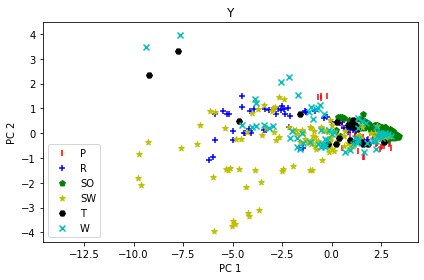

In [0]:
# https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html
colors = ['r', 'b', 'g', 'y', 'k', 'c'] # merah, biru, hijau, kuning, hitam, dan cyan
markers = ['|' , '+' , 'p', '*', 'H', 'x'] # Simbol-simbol yang dapat dilihat pada legenda
for l, c, m in zip(np.unique(typeData), colors, markers):
    plt.scatter(Y[typeData==l, 0 ],
    Y[typeData==l, 1 ],
    c=c, label=l, marker=m)

plt.title('Y')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Saya merekomendasikan mengambil cukup 2 (dua) buah principal component saya, karena bagi saya, mempertahankan 91.83% data setelah mereduksi dimensi sudah cukup baik.

In [0]:
total = sum(np.abs(eigenValues))
percentages = []

for var in np.abs(eigenValues):
    percentage = float(var / total) * 100.0
    percentages.append(percentage)

for percentage in percentages:
    print(percentage)

print("\nDipertahankan {}% dengan mengambil 2 PCA".format(percentages[0] + percentages[1]))

85.30771566351835
6.529174417735412
4.258963791498334
1.253137553683559
0.912774369806777
0.779710852759465
0.08895777606522039
0.2002785318551858
0.3764570571987079
0.29282998587899445

Dipertahankan 91.83689008125376% dengan mengambil 2 PCA
